In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [44]:
suicide = pd.read_csv('who_suicide_statistics.csv')

### Посмотрим информацию о датасете

In [45]:
suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
country        43776 non-null object
year           43776 non-null int64
sex            43776 non-null object
age            43776 non-null object
suicides_no    41520 non-null float64
population     38316 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [46]:
suicide.describe()

,year,suicides_no,population
count,43776.000000,41520.000000,3.831600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,800.589926,3.647231e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,8.511275e+04
50%,1999.000000,14.000000,3.806550e+05
75%,2007.000000,91.000000,1.305698e+06
max,2016.000000,22338.000000,4.380521e+07


In [47]:
suicide.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


### Проверим датасет на наличие null

In [48]:
suicide.isnull().head(5)

,country,year,sex,age,suicides_no,population
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,False,False,False,False,True,False
3,False,False,False,False,True,False
4,False,False,False,False,True,False


In [49]:
suicide.isnull().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

### Достаточно много пропусков в столбцах `suicides_no` и `population`

## Предположим, что самый распространённый возраст самоубийц - подростковый

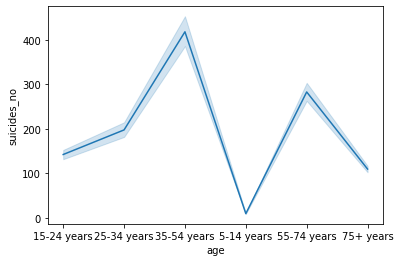

In [50]:
sns.lineplot(x=suicide.age, y=suicide.suicides_no)

### Гипотеза не подтвердилась - больше всего самоубийств просиходит в возрасте от 35 до 54

## Предположим, что с каждым годом количество суицидов увеличивается

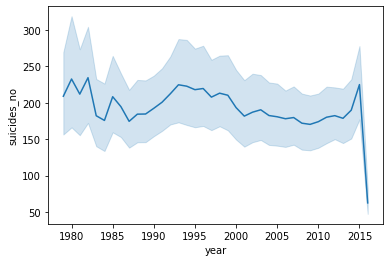

In [51]:
sns.lineplot(x=suicide.year, y=suicide.suicides_no)


### Нет, количество суицидов не увеличивается с каждым годом, более того - в последнее время они совершаются реже

## Предположим, что в России было совершено больше самоубийств, чем в Беларуси

In [52]:
suicide.loc[suicide.country  == 'Russian Federation'].var()

year           1.081671e+02
suicides_no    2.025105e+07
population     2.839055e+13
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DA83780848>,
      dtype=object)

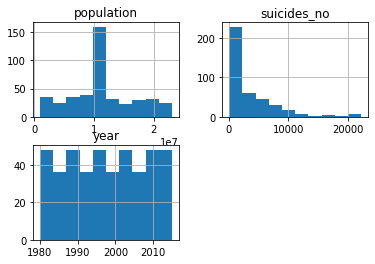

In [53]:
suicide.loc[suicide.country  == 'Russian Federation'].hist()

In [54]:
suicide.loc[suicide.country  == 'Belarus'].var()

year           9.930915e+01
suicides_no    8.467588e+04
population     1.244499e+11
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DA837AFA08>,
      dtype=object)

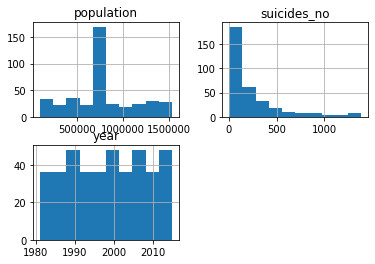

In [55]:
suicide.loc[suicide.country  == 'Belarus'].hist()

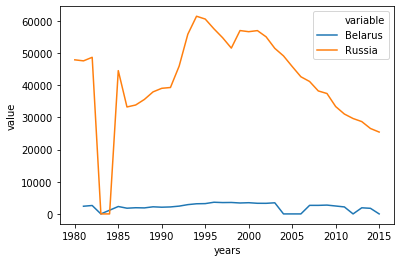

In [56]:
suicides_no_belarus = suicide[suicide.country  == 'Belarus'].groupby(['year']).sum().suicides_no
suicides_no_russia = suicide[suicide.country  == 'Russian Federation'].groupby(['year']).sum().suicides_no
data_preproc = pd.DataFrame({
    'years': suicide[suicide.country  == 'Russian Federation'].year.unique(),
    'Belarus': suicides_no_belarus,
    'Russia': suicides_no_russia,
})
sns.lineplot(x='years', y='value', hue='variable', 
             data=pd.melt(data_preproc, ['years']))

### Действительно, в России было совершено больше суицидов. При этом хочу заметить, что в девяностые в России произошёл всплеск кол-ва суицидов. Тогда как в Беларуси такой всплеск не наблюдается.